In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [51]:
data = pd.read_csv('Online Retail.csv',encoding='latin1')

In [52]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [53]:
data.shape

(541909, 8)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [55]:
round(data.isna().sum() * 100 / len(data),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [56]:
data.dropna(inplace=True)

In [57]:
data['CustomerID'] = data['CustomerID'].astype('str')
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],format="%d-%m-%Y %H:%M")

In [58]:
data2 = pd.DataFrame(data.groupby('CustomerID')['InvoiceNo'].count().reset_index())
data2.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [59]:
data['Amount'] = data['Quantity'] * data['UnitPrice']

In [60]:
data = data[data['UnitPrice'] > 0]

In [61]:
data = data[data['Amount'] > 0]

In [62]:
data.shape

(397884, 9)

In [63]:
desc_df = data['Description'].value_counts().reset_index()
desc_df = desc_df.rename(columns={'index':'Description','Description':'Count'})
desc_df.head()

,Description,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1723
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1396


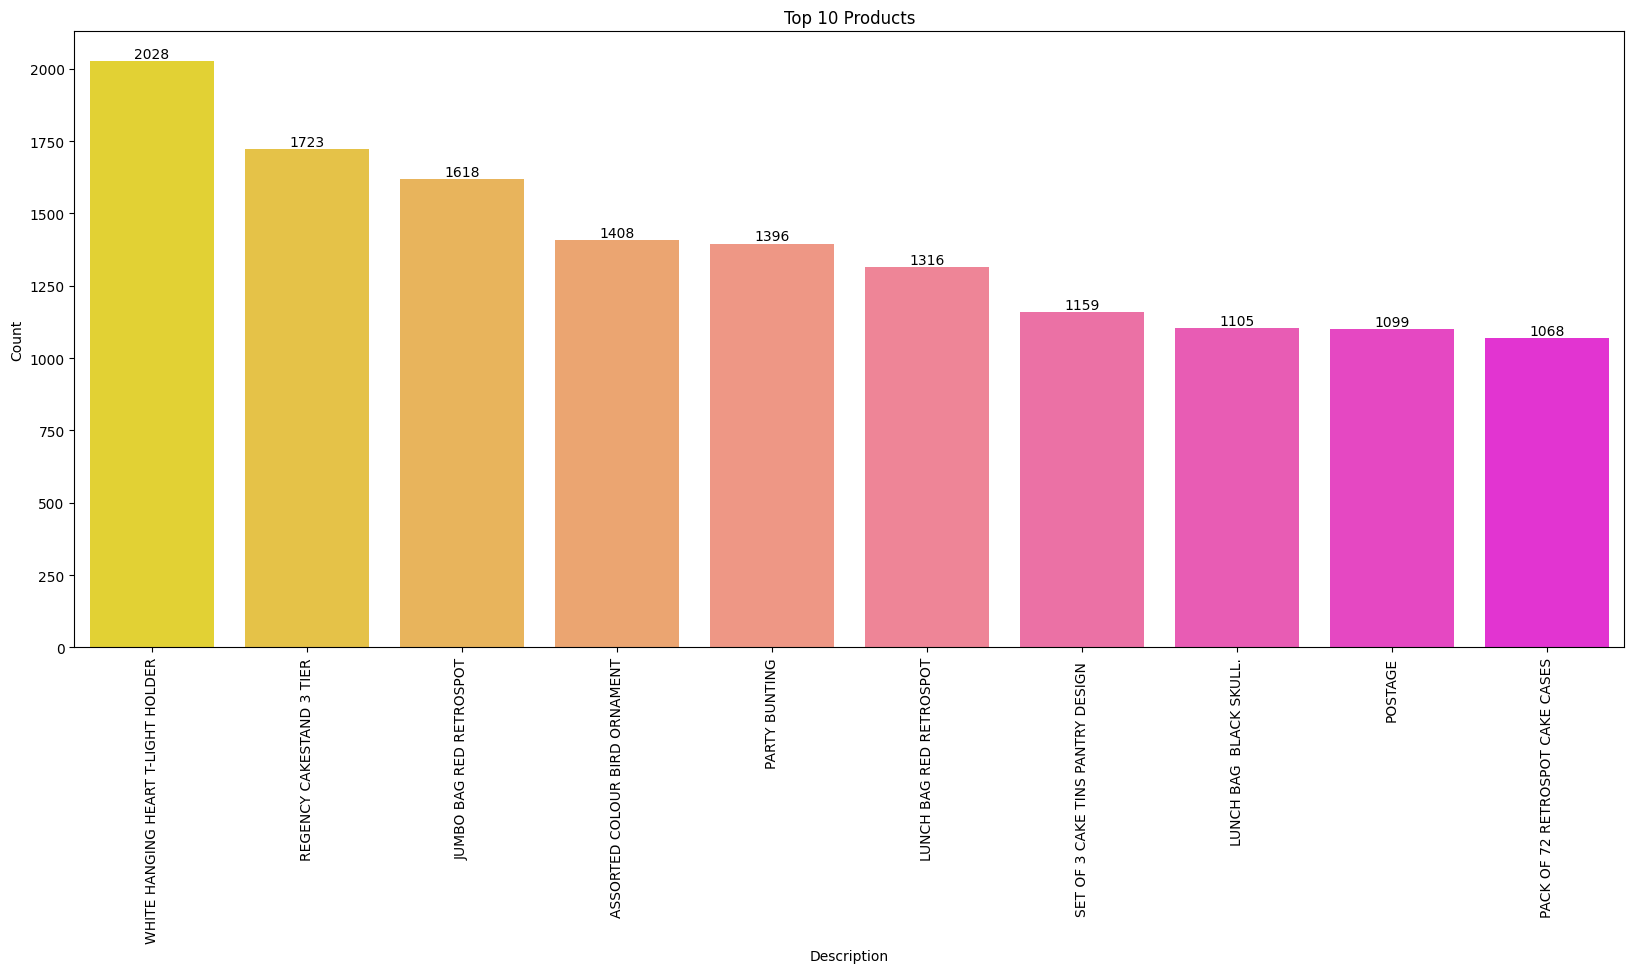

In [64]:
plt.figure(figsize=(20,8))

ax = sns.barplot(data=desc_df[:10],x='Description',y='Count',palette='spring_r')
for bar in ax.containers:
    ax.bar_label(bar)
    
plt.title('Top 10 Products')
plt.xticks(rotation=90)
plt.show()

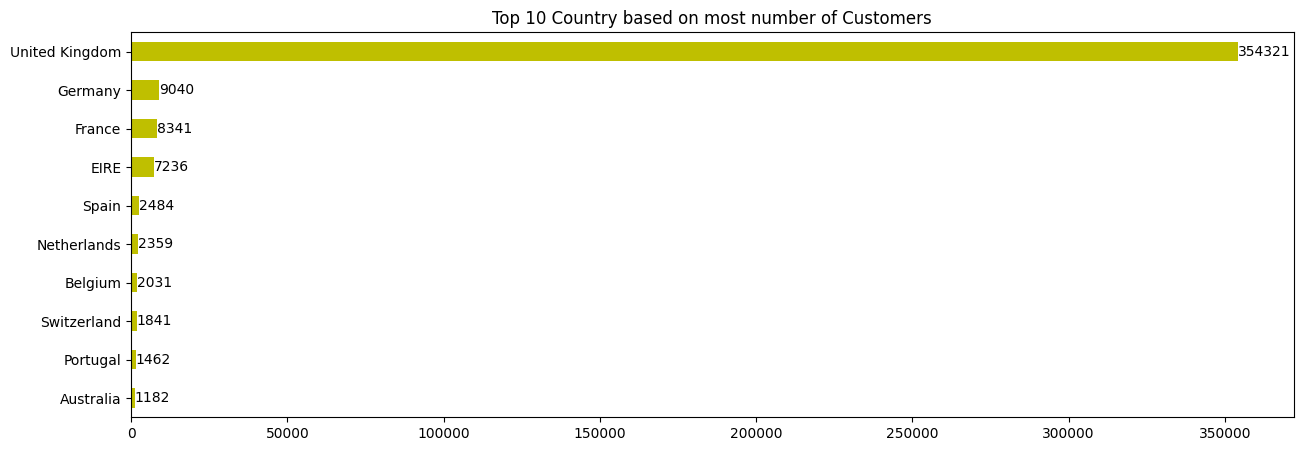

In [65]:
plt.figure(figsize=(15,5))
ax = data['Country'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh',color='y')
for bar in ax.containers:
    ax.bar_label(bar)
    
plt.title('Top 10 Country based on most number of Customers')
plt.show()

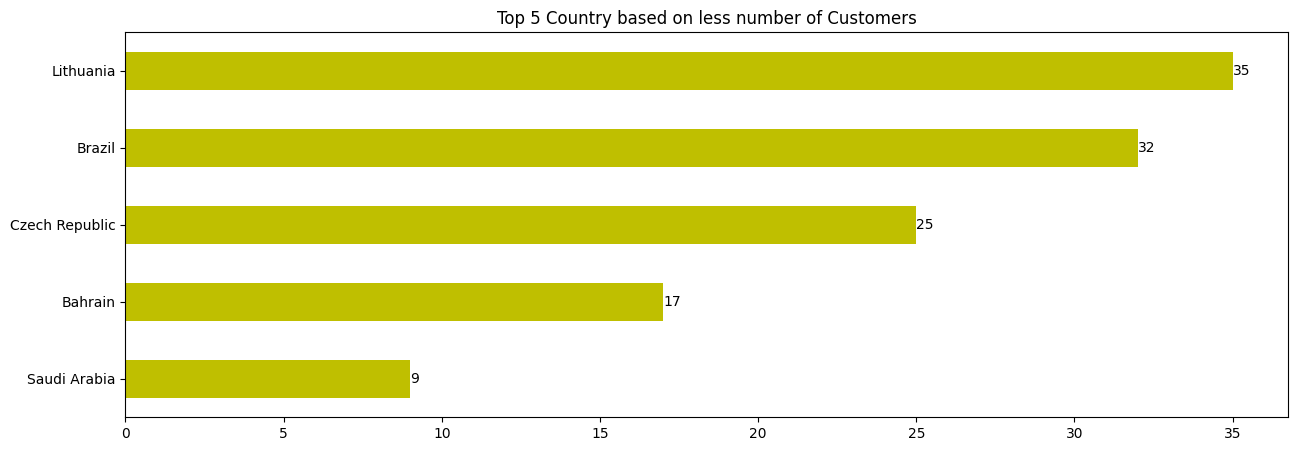

In [66]:
plt.figure(figsize=(15,5))
ax = data['Country'].value_counts()[-5:].sort_values(ascending=True).plot(kind='barh',color='y')
for bar in ax.containers:
    ax.bar_label(bar)
    
plt.title('Top 5 Country based on less number of Customers')
plt.show()

In [67]:
data['Month'] = data['InvoiceDate'].dt.month_name()

In [68]:
data.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December


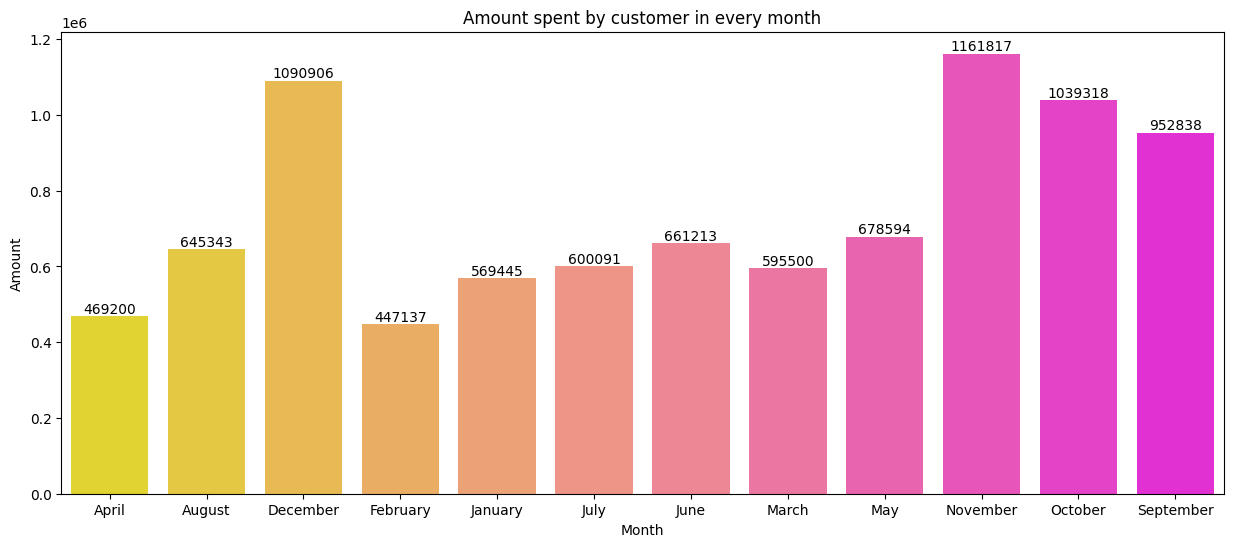

In [69]:
plt.figure(figsize=(15,6))
month_df = data.groupby('Month')['Amount'].sum().reset_index()
ax = sns.barplot(data=month_df,x='Month',y='Amount',palette='spring_r')
for bar in ax.containers:
    ax.bar_label(bar,fmt='%d')
plt.title('Amount spent by customer in every month')
plt.show()

In [70]:
data['Hour'] = data['InvoiceDate'].dt.hour
hour_df = data['Hour'].value_counts().reset_index()
hour_df = hour_df.rename(columns={'index':'Hour','Hour':'Count'})
hour_df

,Hour,Count
0,12,72065
1,13,64026
2,14,54118
3,11,49084
4,15,45369
5,10,37997
6,16,24089
7,9,21944
8,17,13071
9,8,8690


In [71]:
# dividing hours into morning, afternoon, evening
def convert_time(time):
    if (time >=6 and time<=11):
        return 'Morning'
    elif (time>=12 and time<=17):
        return 'Afternoon'
    else:
        return 'Evening'

In [72]:
hour_df['time_type'] = hour_df['Hour'].apply(convert_time)

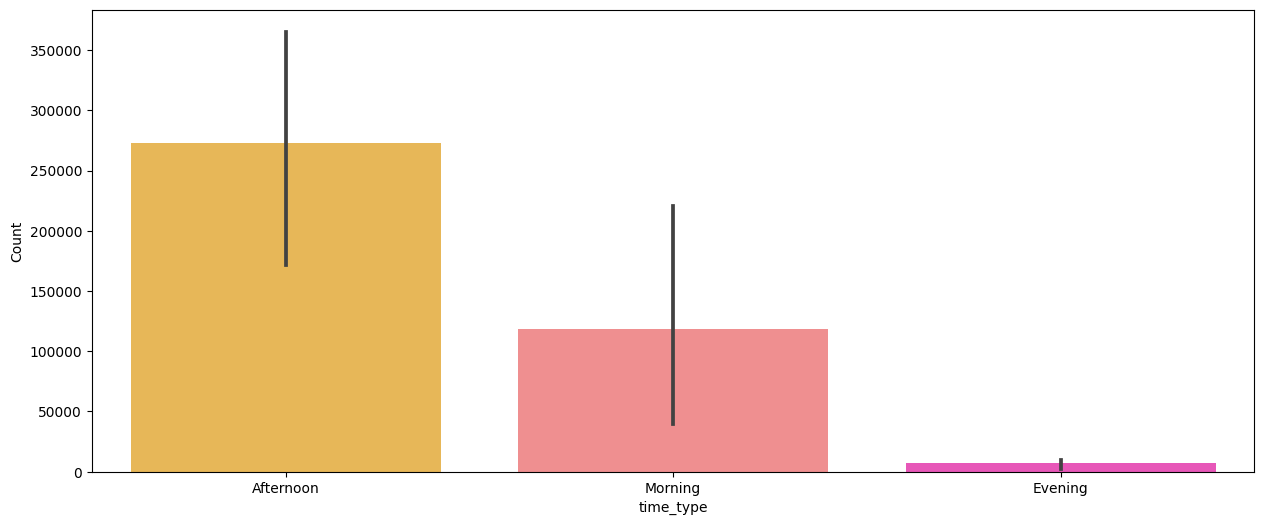

In [73]:
plt.figure(figsize=(15,6))
sns.barplot(data=hour_df,x='time_type',y='Count',estimator='sum',palette='spring_r')
plt.show()

## Create the RFM model (Recency, Frequency,Monetary value)

### Recency – How recently did the customer purchase?
### Frequency – How often do they purchase?
### Monetary – How much do they spend?


##### Recency 
- In order to find the recency value of each customer, we need to determine the last invoice date as the current date and subtract the last purchasing date of each customer from this date.

##### Frequency 
- In order to find the frequency value of each customer, we need to determine how many times the customers make purchases.

##### Monetary 
- In order to find the monetary value of each customer, we need to determine how much do the customers spend on purchases.

In [74]:
# amount spent
amount_spent = data.groupby('CustomerID')['Amount'].sum().reset_index()
amount_spent.head()

,CustomerID,Amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [75]:
# frequency
customer_frequency= data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
customer_frequency = customer_frequency.rename(columns={'InvoiceNo':'Frequency'})
customer_frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [76]:
merge_df = pd.merge(amount_spent,customer_frequency,on='CustomerID',how='inner')
merge_df.head()

,CustomerID,Amount,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [77]:
# recency
max_date = max(data['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [78]:
data['diff'] = max_date - data['InvoiceDate']

In [79]:
customer_recency = data.groupby('CustomerID')['diff'].min().reset_index()
customer_recency.head()

,CustomerID,diff
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [80]:
customer_recency['diff'] = customer_recency['diff'].dt.days
customer_recency.head()

,CustomerID,diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [81]:
final_df = pd.merge(merge_df,customer_recency,on='CustomerID',how='inner')
final_df = final_df.rename(columns={'diff':'Recency'})
final_df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


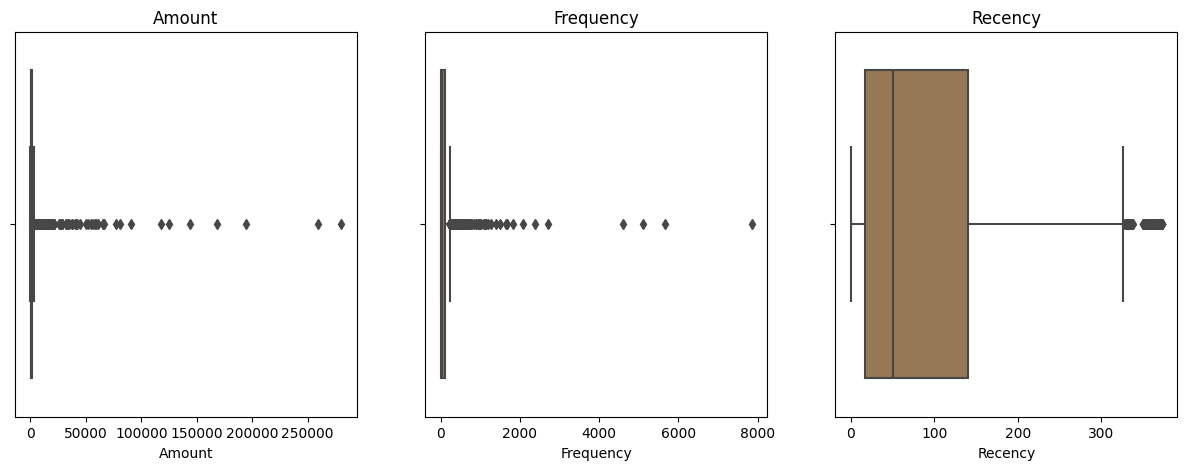

In [82]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
sns.boxplot(ax=axes[0],data=final_df,x='Amount',palette='cubehelix')
axes[0].set_title('Amount')

sns.boxplot(ax=axes[1],data=final_df,x='Frequency',palette='cubehelix')
axes[1].set_title('Frequency')

sns.boxplot(ax=axes[2],data=final_df,x='Recency',palette='cubehelix')
axes[2].set_title('Recency')


plt.show()

In [83]:
Q1 = final_df['Amount'].quantile(0.05)
Q3 = final_df['Amount'].quantile(0.95)
IQR = Q3-Q1
final_df = final_df[(final_df['Amount'] >= Q1 - 1.5*IQR) & (final_df['Amount'] <= Q1 + 1.5*IQR)]


Q1 = final_df['Frequency'].quantile(0.05)
Q3 = final_df['Frequency'].quantile(0.95)
IQR = Q3-Q1
final_df = final_df[(final_df['Frequency'] >= Q1 - 1.5*IQR) & (final_df['Frequency'] <= Q1 + 1.5*IQR)]


Q1 = final_df['Recency'].quantile(0.05)
Q3 = final_df['Recency'].quantile(0.95)
IQR = Q3-Q1
final_df = final_df[(final_df['Recency'] >= Q1 - 1.5*IQR) & (final_df['Recency'] <= Q1 + 1.5*IQR)]

In [84]:
scale_features = final_df[['Amount','Frequency','Recency']]

scaling = StandardScaler()
scaled_df = pd.DataFrame(scaling.fit_transform(scale_features))

In [85]:
scaled_df.columns=['Amount','Frequency','Recency']

In [86]:
scaled_df.head(10)

,Amount,Frequency,Recency
0,2.345164,1.581755,-0.936916
1,0.486104,-0.475686,-0.211811
2,0.456740,0.096582,-0.768056
3,-0.596175,-0.666443,2.122431
4,1.010508,0.260087,-0.599196
5,-0.777733,-0.843573,1.069539
6,-0.044988,-0.107800,1.347661
7,-0.503694,-0.720944,1.168868
8,1.236450,-0.094174,-0.728325
9,3.749151,0.886857,-0.628995


In [87]:
# K-Means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(scaled_df)

KMeans(max_iter=50, n_clusters=4)

In [88]:
kmeans.labels_

array([1, 0, 0, ..., 2, 0, 0])

In [89]:
set(kmeans.labels_)

{0, 1, 2, 3}

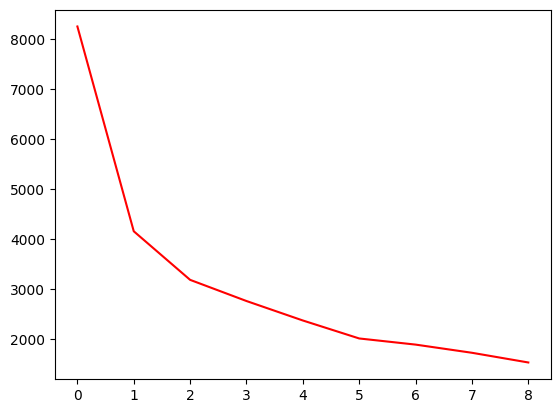

In [90]:
# elbow curve to get right number of clusters

cluster = []
range_n_cluster = [2,3,4,5,6,7,8,9,10]

for num_cluster in range_n_cluster:
    kmeans = KMeans(n_clusters=num_cluster,max_iter=50)
    kmeans.fit(scaled_df)
    
    cluster.append(kmeans.inertia_)
plt.plot(cluster,color='r')
plt.show()

In [91]:
kmeans = KMeans(n_clusters=3,max_iter=300)
kmeans.fit(scaled_df)

KMeans(n_clusters=3)

In [92]:
final_df['Clsuter_ID'] = kmeans.predict(scaled_df)
final_df.head()

,CustomerID,Amount,Frequency,Recency,Clsuter_ID
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2
5,12352.0,2506.04,85,35,1


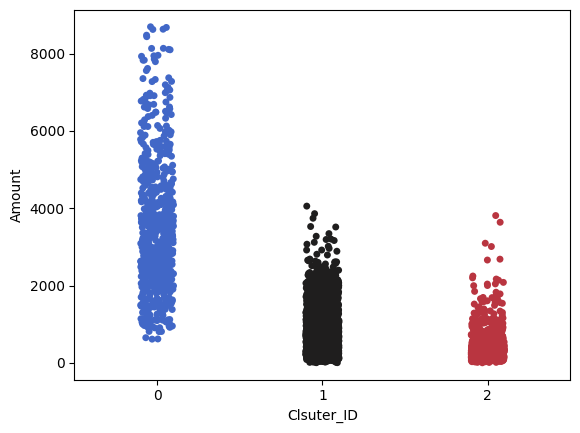

In [93]:
sns.stripplot(x=final_df['Clsuter_ID'],y='Amount',data=final_df,palette='icefire')
plt.show()

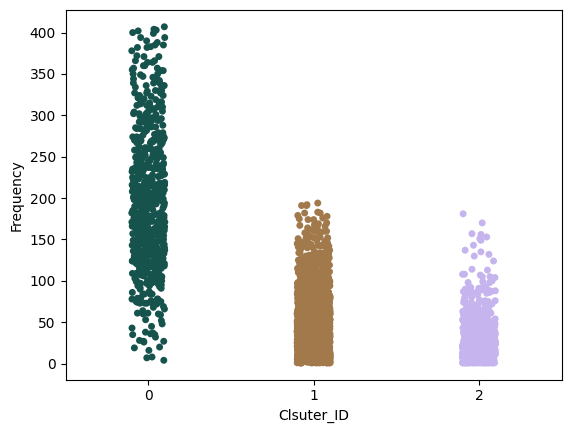

In [94]:
sns.stripplot(x=final_df['Clsuter_ID'],y='Frequency',data=final_df,palette='cubehelix')
plt.show()

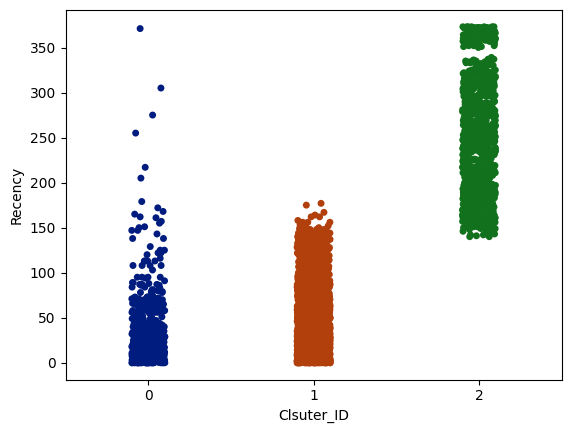

In [95]:
sns.stripplot(x=final_df['Clsuter_ID'],y='Recency',data=final_df,palette='dark')
plt.show()

In [96]:
import plotly.express as px
import plotly.graph_objects as go

In [97]:
fig = px.scatter_3d(
    final_df, 
    x='Amount', 
    y='Frequency', 
    z='Recency', 
    color='Clsuter_ID',
    title='3D Scatter Plot of Clusters',
    labels={'Amount': 'Amount', 'Frequency': 'Frequency', 'Recency': 'Recency'}
)

# Show the plot
fig.show()

In [49]:
import joblib
with open('customer-segmentation-model.joblib','wb') as f:
    joblib.dump(kmeans,f)